# Assignment 1

In this assignment we are going to combine two datasets and investigate the distribution of a single variable.

In [1]:
# importing stuff for drawing plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Getting the data

In [2]:
# open the dataframes with the right separators
step_data = pd.read_csv("steps.csv", sep=";")
survey_data = pd.read_csv('survey.csv')

In [3]:
# merge the two dataframes and show the head of the dataframe
df = survey_data.merge(step_data, on = "id")
df.head(5)

,id,city,gender,age,hh_size,education_1,height,weight,20-6-2013,21-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,Master or doctorate,178.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,Bachelor,180.0,77.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,Master or doctorate,180.0,83.0,NaN,11428.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,Bachelor,178.0,80.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,Bachelor,167.0,61.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analyzing a quantitative variable

Let's inspect the variable *height*. Let's start by making a histogram.

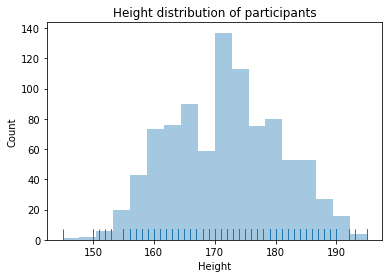

In [82]:
sns.distplot(df["height"], kde=False) #kde=False means we don't get an overlying density plot
plt.title("Height distribution of participants")
plt.xlabel("Height")
plt.ylabel("Count")
plt.show()

Now a density plot.

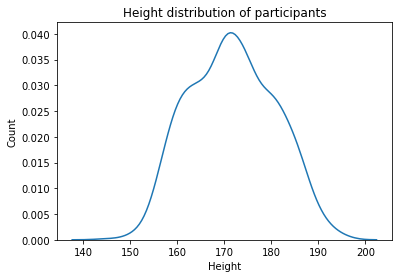

In [83]:
sns.distplot(df["height"], hist=False, kde=True) #No histogram
plt.title("Height distribution of participants")
plt.xlabel("Height")
plt.ylabel("Proportion")
plt.show()

Finally some summary statistics.

In [81]:
# calculate some statistics for weight
print('median: ' + str(float(df[['height']].median())))
print('mode: ' + str(df[['height']].mode()['height'][0]))
print('mean: ' + str(float(df[['height']].mean())))
print('standard deviation: ' + str(float(df[['height']].std())))
print('variance: ' + str(float(df[['height']].var())))

median: 172.0
mode: 170.0
mean: 171.66810344827587
standard deviation: 9.080235412579503
variance: 82.45067514786287


What can we conclude from this?

* The center of the distribution is around 170-172. It doesn't matter much if we take the median, mode or mean (although the mode would be a bad idea in any case, since there are so many possible values).
* The standard deviation is about 9.1 cm
* There is no right or left skew. The distribution is reasonably symmetrical.
* The distribution is bimodal (it has two peaks). This can be clearly seen in the histogram but is obscured in the density plot, since it tries to model the data. The peaks represent the peaks of the male and female height distributions.
* The distribution is not normal (bell-shaped), but is a combination of two more or less normal distributions


## A time series

Now to create a plot of a time series, e.g. mean steps per day over all participants.

In [5]:
mean_steps = df.loc[:,"20-6-2013":"13-5-2014"].mean() #get the mean over the columns (all the dates) and store
#mean_steps
mean_steps.index #the indexes now contain the dates

Index(['20-6-2013', '21-6-2013', '22-6-2013', '23-6-2013', '24-6-2013',
       '25-6-2013', '26-6-2013', '27-6-2013', '28-6-2013', '29-6-2013',
       ...
       '4-5-2014', '5-5-2014', '6-5-2014', '7-5-2014', '8-5-2014', '9-5-2014',
       '10-5-2014', '11-5-2014', '12-5-2014', '13-5-2014'],
      dtype='object', length=328)

Now to make the plot. We make the plot in Seaborn (sns) and then change settings in Matplotlib (plt)

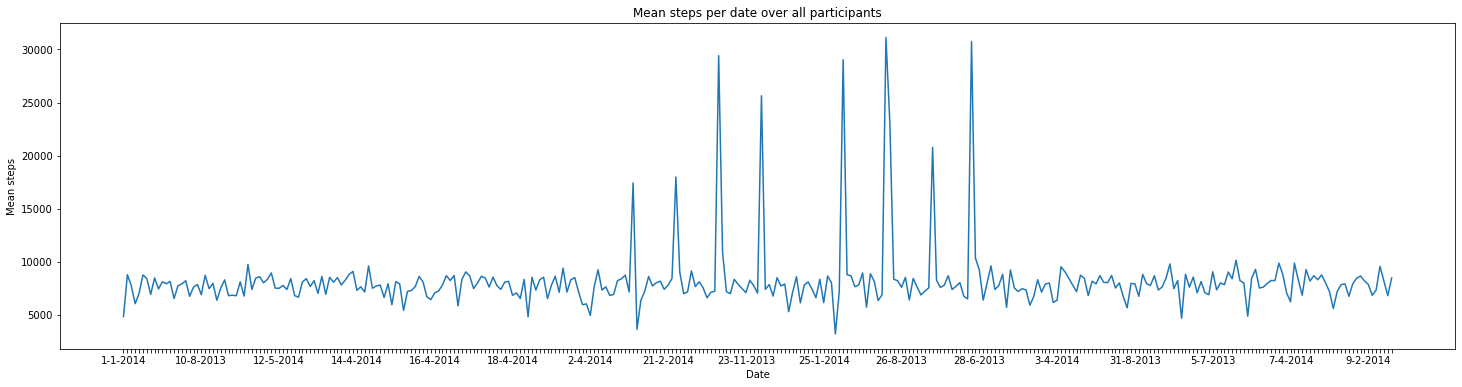

In [7]:
plt.figure(figsize=(25, 6)) #set the figure ("canvas") size
plot = sns.lineplot(x=mean_steps.index, y=mean_steps) #create the plot

#Now a tricky part. If we plot all the dates, they overlap. So we need to make some ticks invisible. 

for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 20 == 0:  # every 20th label is kept
                label.set_visible(True)
    else:
        label.set_visible(False)

plt.title("Mean steps per date over all participants") #set the title
plt.xlabel("Date") #set the x-label
plt.ylabel("Mean steps") #set the y-label

plt.show() #show the plot